In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sn

In [4]:
import geopandas as gpd
import pandas as pd

In [6]:
heatwave_length = pd.read_csv(r"/global/cfs/cdirs/m1532/Projects_MVP/geospatial/climate_heatwave/city_heatwave/city_heatwave/min_apparent_temp/city_heatwave_season_length_1961_2021.csv").drop(columns={'Unnamed: 0'})
heatwave_length

,year,city_name,heatwave_season_length
0,1961,Albuquerque,44
1,1961,Allentown,36
2,1961,Austin,2
3,1961,Birmingham,8
4,1961,Boston,56
...,...,...,...
2104,2021,Seattle,50
2105,2021,St. Louis,56
2106,2021,Tampa,138
2107,2021,Tucson,5


In [7]:
heatwave_year = heatwave_length.drop(['year'], axis = 1)
heatwave_year = heatwave_year.groupby(['city_name']).mean()
heatwave_year = heatwave_year.reset_index()
heatwave_year

,city_name,heatwave_season_length
0,Albany,2.000000
1,Albuquerque,25.265306
2,Allentown,30.215686
3,Atlanta,14.272727
4,Austin,38.794872
5,Baltimore,47.607143
6,Baton Rouge,38.781818
7,Birmingham,31.325000
8,Boston,40.389831
9,Buffalo,34.880952


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


In [9]:
def formatName(name):
    return name[:-1]

In [10]:
df['name'] = df['name'].apply(formatName)
df.head()

,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


In [11]:
df['name'].unique()

array(['New York', 'Los Angeles', 'Chicago', ..., 'Spanish Fort',
       'Plaquemine', 'Milton-Freewater'], dtype=object)

In [12]:
heatwave_year = heatwave_year.rename(columns = {'city_name': 'name'})
heatwave_data = heatwave_year.merge(df, on = 'name', how = 'inner')
heatwave_data

,name,heatwave_season_length,pop,lat,lon
0,Albany,2.000000,98012,42.651167,-73.754968
1,Albany,2.000000,77746,42.651167,-73.754968
2,Albany,2.000000,51053,42.651167,-73.754968
3,Albany,2.000000,18767,42.651167,-73.754968
4,Albuquerque,25.265306,551813,35.084103,-106.650985
...,...,...,...,...,...
76,St. Louis,27.918367,319188,38.627273,-90.197889
77,St. Louis,27.918367,7380,38.627273,-90.197889
78,Tampa,51.255319,346934,27.947760,-82.458444
79,Tucson,27.404255,524192,32.221742,-110.926476


In [13]:
heatwave_data = heatwave_data.drop('pop', axis = 1)
heatwave_data = heatwave_data.drop_duplicates()
heatwave_data

,name,heatwave_season_length,lat,lon
0,Albany,2.000000,42.651167,-73.754968
4,Albuquerque,25.265306,35.084103,-106.650985
5,Atlanta,14.272727,33.749099,-84.390185
6,Austin,38.794872,30.271129,-97.743700
8,Baltimore,47.607143,39.290861,-76.610807
9,Baton Rouge,38.781818,30.450746,-91.154551
10,Boston,40.389831,42.360482,-71.059568
11,Buffalo,34.880952,42.886447,-78.878369
13,Charlotte,26.818182,35.227087,-80.843127
15,Chicago,32.268293,41.875555,-87.624421


In [14]:
heatwave_data['name'].nunique()

45

In [15]:
def categorize_heatwaves(count):
    if count <= 2:
        return 'lightyellow'
    elif count <= 4:
        return 'yellow'
    elif count <= 6:
        return 'gold'
    elif count <= 8:
        return 'darkorange'
    else:
        return 'tomato'

In [17]:
heatwave_data['color'] = heatwave_data['heatwave_season_length'].apply(categorize_heatwaves)

In [19]:
import plotly.graph_objects as go

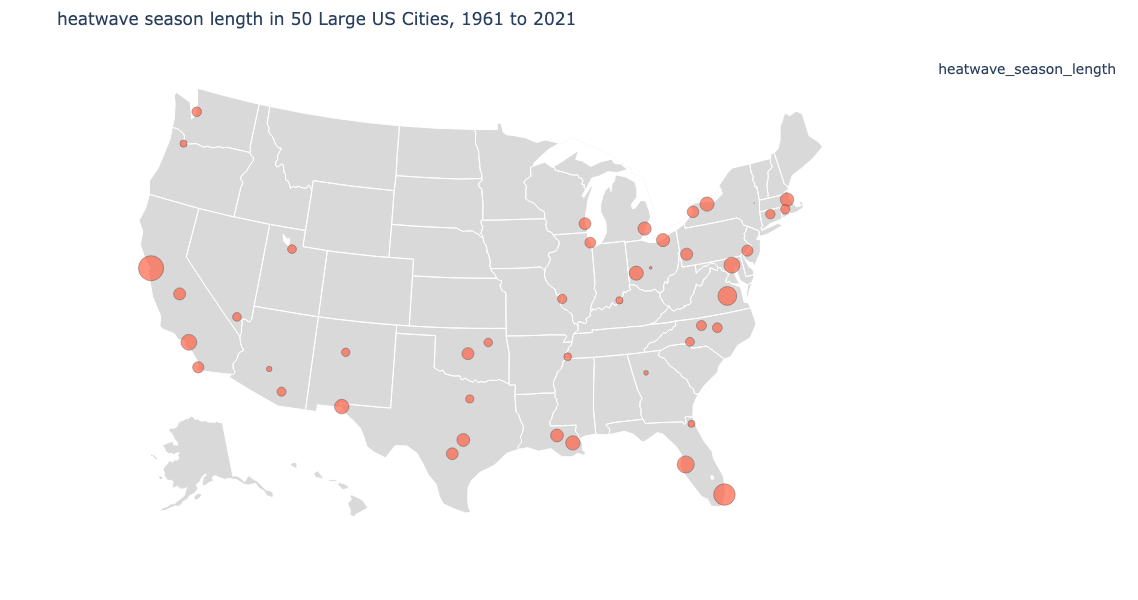

In [23]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = heatwave_data['lon'],
    lat = heatwave_data['lat'],
    text = heatwave_data['name'] + '<br>Heatwaves: ' + heatwave_data['heatwave_season_length'].astype(str),
    marker = dict(
        size = heatwave_data['heatwave_season_length']/3,
        color = heatwave_data['color'],
        showscale = True,  # Show the color scale bar
        colorbar = dict(
            title = "heatwave_season_length",
            titleside = 'top',
            tickmode = 'array',
            tickvals = ['lightyellow', 'yellow', 'gold', 'darkorange', 'tomato'],
            ticktext = ['≤ 2', '> 2-4', '> 4-6', '> 6-8', '> 8'],
            ticks = 'outside'
        ),
        line_color='rgb(40,40,40)',
        line_width=0.5,
    ),
    hoverinfo = 'text'
))

fig.update_layout(
    title_text = 'heatwave season length in 50 Large US Cities, 1961 to 2021',
    geo = dict(
        scope='usa',
        projection_type='albers usa',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    ),
    width=1000,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

In [24]:
heatwave_data = heatwave_data.rename(columns = {'heatwave_season_length': 'season_length'})

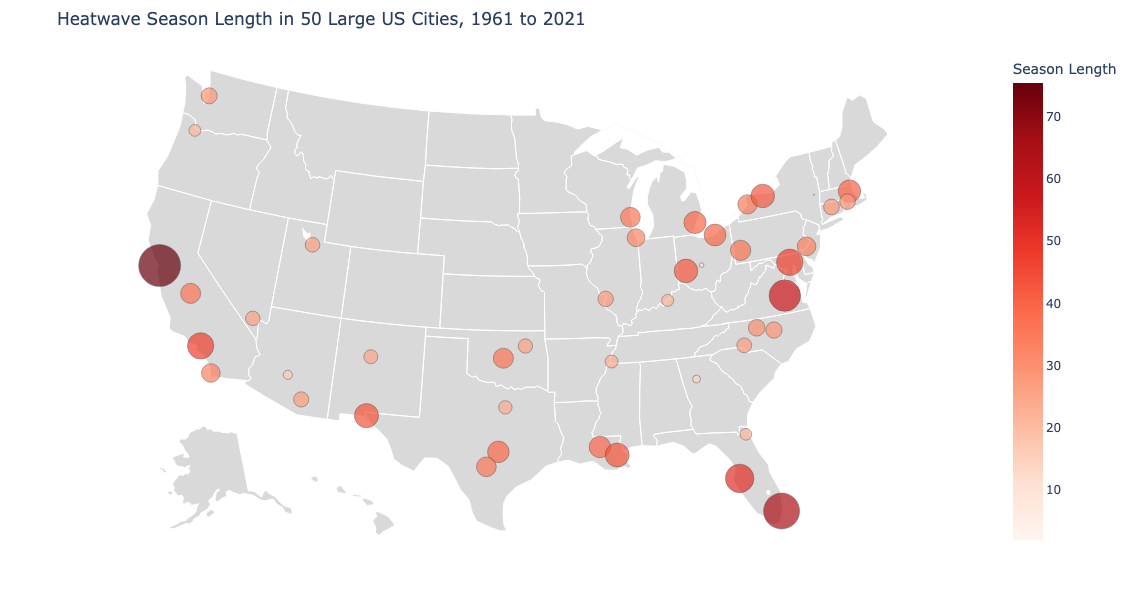

In [26]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = heatwave_data['lon'],
    lat = heatwave_data['lat'],
    text = heatwave_data['name'] + '<br>Heatwaves: ' + heatwave_data['season_length'].astype(str),
    marker = dict(
        size = heatwave_data['season_length']/1.8,  # Scale marker size by heatwave count
        color = heatwave_data['season_length'],
        colorscale = 'Reds',
        colorbar_title = "Season Length",
        line_color='rgb(40,40,40)',
        line_width=0.5,
    ),
    hoverinfo = 'text'
))

fig.update_layout(
    title_text = 'Heatwave Season Length in 50 Large US Cities, 1961 to 2021',
    geo = dict(
        scope='usa',
        projection_type='albers usa',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    ),
    width=1000,  # Width of the figure in pixels
    height=600,  # Height of the figure in pixels
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()
